### Bibliotecas

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv(r'Dataframe_airbnb\listings.csv', low_memory=False)
print([coluna for coluna in df.columns])
print(df.shape)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

A base de dados possui muitas colunas com informações desnecessárias ou repetitivas para a análise. Portanto vou descartar estas colunas. Depois, analisar os valores vazios

In [70]:
col_drop = ['id', 'state', 'city',	'listing_url', 	'scrape_id', 	'last_scraped', 	'name', 	'summary', 	'space', 	'description', 	'experiences_offered', 	'neighborhood_overview', 	'notes', 	'transit', 	'access', 	'interaction', 	'house_rules', 	'thumbnail_url', 	'medium_url', 	'picture_url', 	'xl_picture_url', 	'host_id', 	'host_url', 	'host_name', 	'host_since', 	'host_location', 	'host_about', 	'host_response_time', 	'host_response_rate', 	'host_acceptance_rate', 	'host_thumbnail_url', 	'host_picture_url', 	'host_neighbourhood', 	'host_listings_count', 	'host_total_listings_count', 	'host_verifications', 	'host_has_profile_pic', 	'host_identity_verified', 	'street', 	'neighbourhood_cleansed', 	'neighbourhood_group_cleansed', 	'market', 	'smart_location', 	'country_code', 	'country', 	'is_location_exact', 	'square_feet', 	'weekly_price', 	'monthly_price', 	'guests_included', 	'minimum_minimum_nights', 	'maximum_minimum_nights', 	'minimum_maximum_nights', 	'minimum_nights_avg_ntm', 	'maximum_nights_avg_ntm', 	'calendar_updated', 	'has_availability', 	'availability_30', 	'availability_60', 	'availability_90', 	'availability_365', 	'calendar_last_scraped', 	'number_of_reviews', 	'number_of_reviews_ltm', 	'first_review', 	'last_review', 	'review_scores_rating', 	'review_scores_accuracy', 	'review_scores_cleanliness', 	'review_scores_checkin', 'zipcode',	'review_scores_communication', 	'review_scores_location','neighbourhood' ,	'review_scores_value', 	'requires_license', 	'license', 	'jurisdiction_names',  	'require_guest_profile_picture', 	'require_guest_phone_verification', 	'calculated_host_listings_count', 	'calculated_host_listings_count_entire_homes', 	'calculated_host_listings_count_private_rooms', 	'calculated_host_listings_count_shared_rooms', 	'reviews_per_month', 'maximum_maximum_nights', 'maximum_nights']

df = df.drop(col_drop, axis=1)
print(df.shape)

(35793, 19)


In [71]:
display(df.isnull().sum())

host_is_superhost               5
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                      67
bedrooms                       73
beds                          329
bed_type                        0
amenities                       0
price                           0
security_deposit            15642
cleaning_fee                11520
extra_people                    0
minimum_nights                  0
instant_bookable                0
is_business_travel_ready        0
cancellation_policy             0
dtype: int64

Podemos observar que duas colunas apresentam aproximadamente 50% dos valores vazios, com isso elas serão retiradas da base. Por outro lado, algumas colunas apresentam pequenos valores vazios, neste caso serão retirado apenas as linhas

In [72]:
print(df.shape)

col_drop = ['security_deposit', 'cleaning_fee']
df = df.drop(col_drop,axis=1)

df = df.dropna()

print(df.shape)

(35793, 19)
(35369, 17)


Com estes processedimentos a base de dados esta "limpa" e podemos tratar os dados de cada coluna, se necessário.

### Análise do tipo de informação 

In [73]:
aux = pd.DataFrame({
    'Values': df.iloc[0],
    'Type': df.dtypes
})

display(aux)

,Values,Type
host_is_superhost,t,object
latitude,-22.96592,float64
longitude,-43.17896,float64
property_type,Condominium,object
room_type,Entire home/apt,object
accommodates,5,int64
bathrooms,1.0,float64
bedrooms,2.0,float64
beds,2.0,float64
bed_type,Real Bed,object


Duas colunas estão classificadas erradas, elas serão convertidas para float

In [74]:
col_convert_float = ['price', 'extra_people']

for coluna in col_convert_float:
    df[coluna] = df[coluna].str.replace('$','')
    df[coluna] = df[coluna].str.replace(',','')
    df[coluna] = df[coluna].astype(np.float32, copy= False)

In [75]:
aux = pd.DataFrame({
    'Values': df.iloc[0],
    'Type': df.dtypes
})

display(aux)

,Values,Type
host_is_superhost,t,object
latitude,-22.96592,float64
longitude,-43.17896,float64
property_type,Condominium,object
room_type,Entire home/apt,object
accommodates,5,int64
bathrooms,1.0,float64
bedrooms,2.0,float64
beds,2.0,float64
bed_type,Real Bed,object


### Analisar as correlações entre as colunas númericas e tratar outliers

<Axes: >

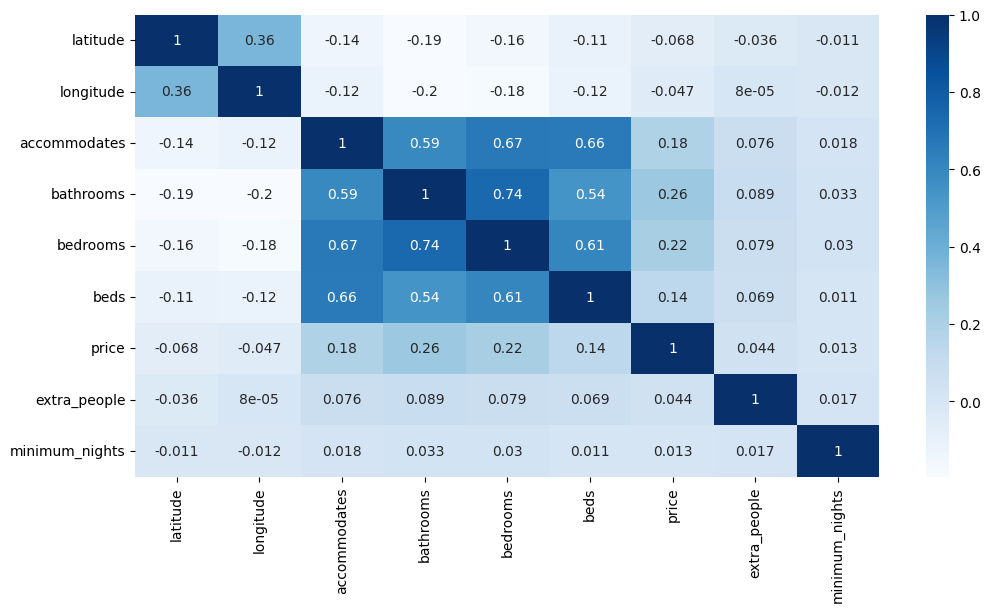

In [76]:
df_num = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(df_num.corr(),annot=True,cmap='Blues')

In [77]:
# equação para descobrir os quartis e com isso o limite superior e inferior
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

# plotar as informações dos limites e outliers
def diagrama(coluna):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax = ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna,ax = ax2)

def histograma(coluna):
    sns.displot(coluna, kde=True, height=5, aspect=3)

def excluir_outlier(df, nome_coluna):
    qtd_lin = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf ) & (df[nome_coluna] <= lim_sup ), :]
    lins_removidas = qtd_lin - df.shape[0]
    print(f'{lins_removidas} foram retiradas da coluna {nome_coluna}')
    histograma(df[nome_coluna])
    return df

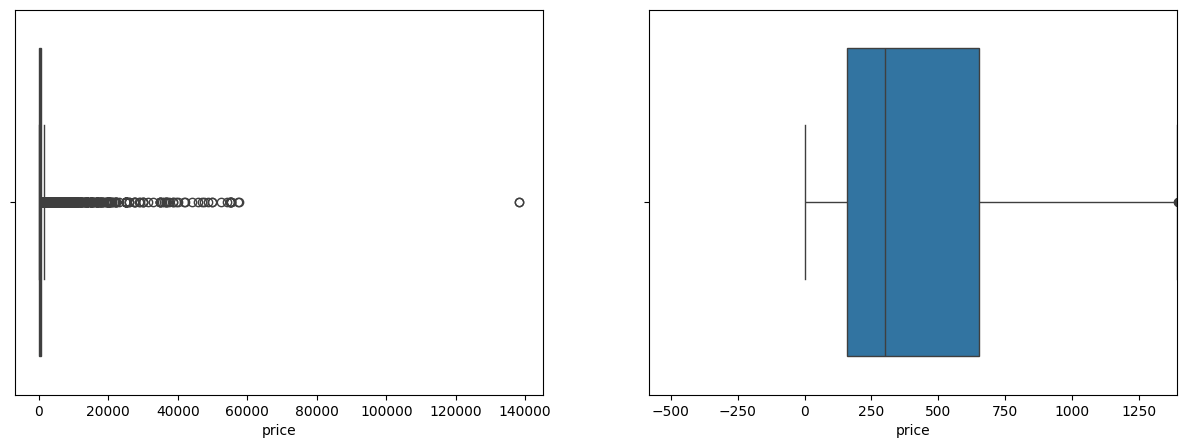

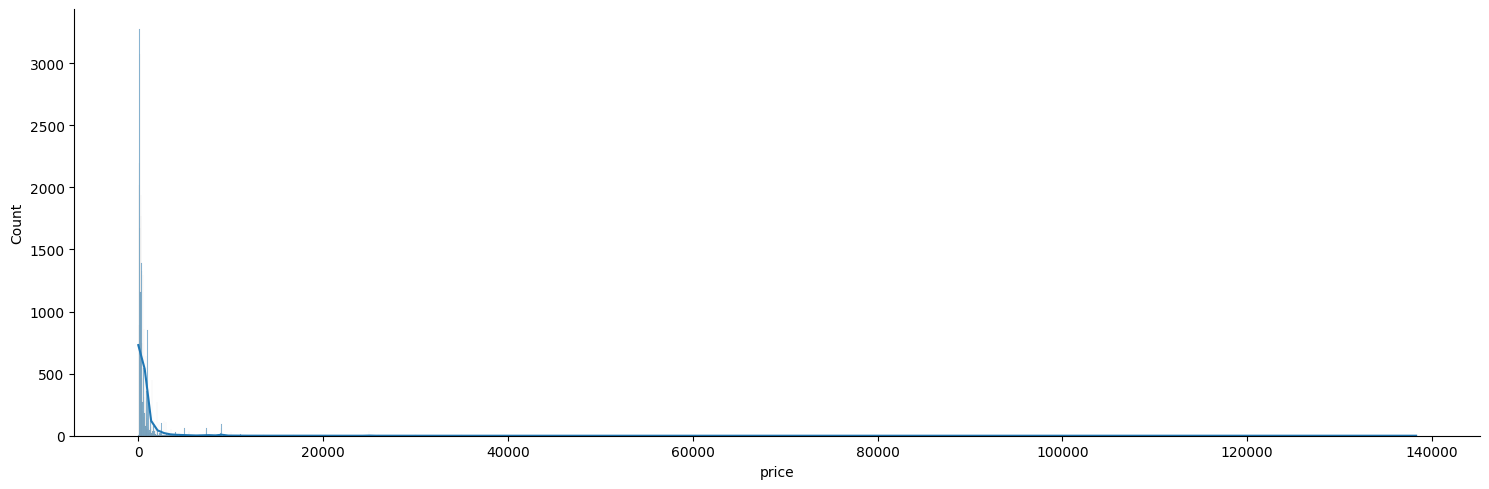

In [78]:
#Column Price
diagrama(df['price'])
histograma(df['price'])

3785 foram retiradas da coluna price


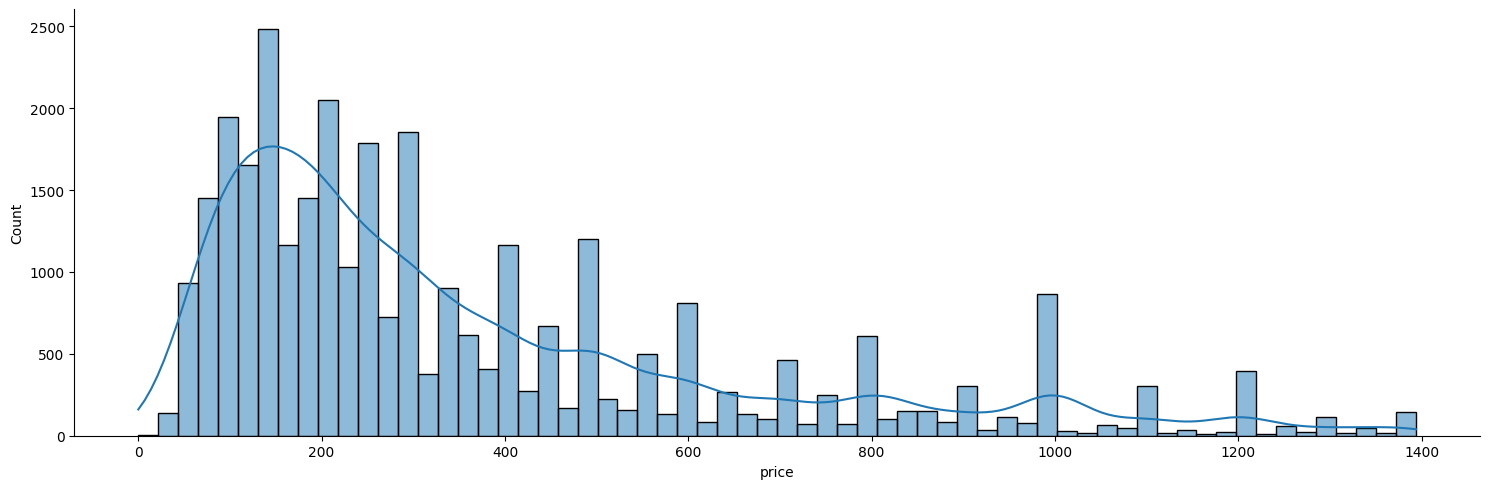

In [79]:
df = excluir_outlier(df, 'price')

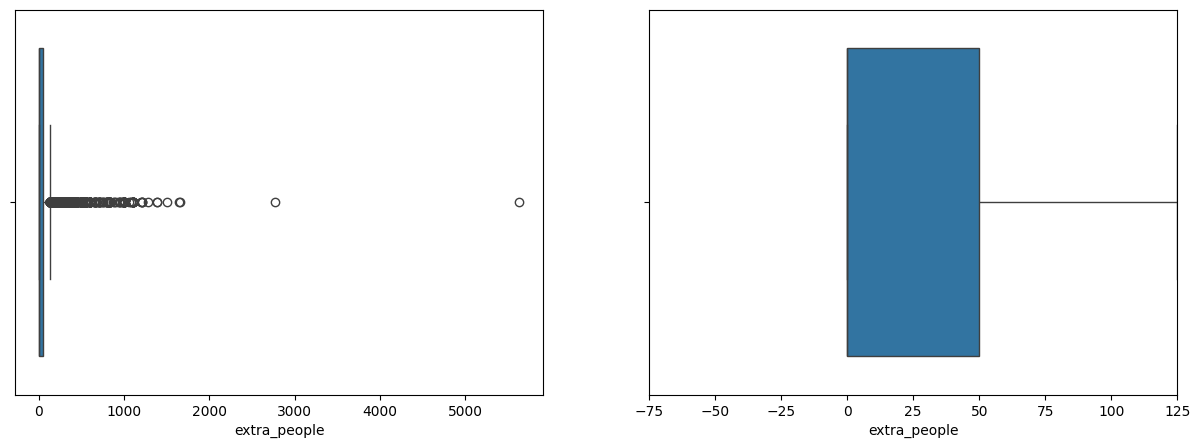

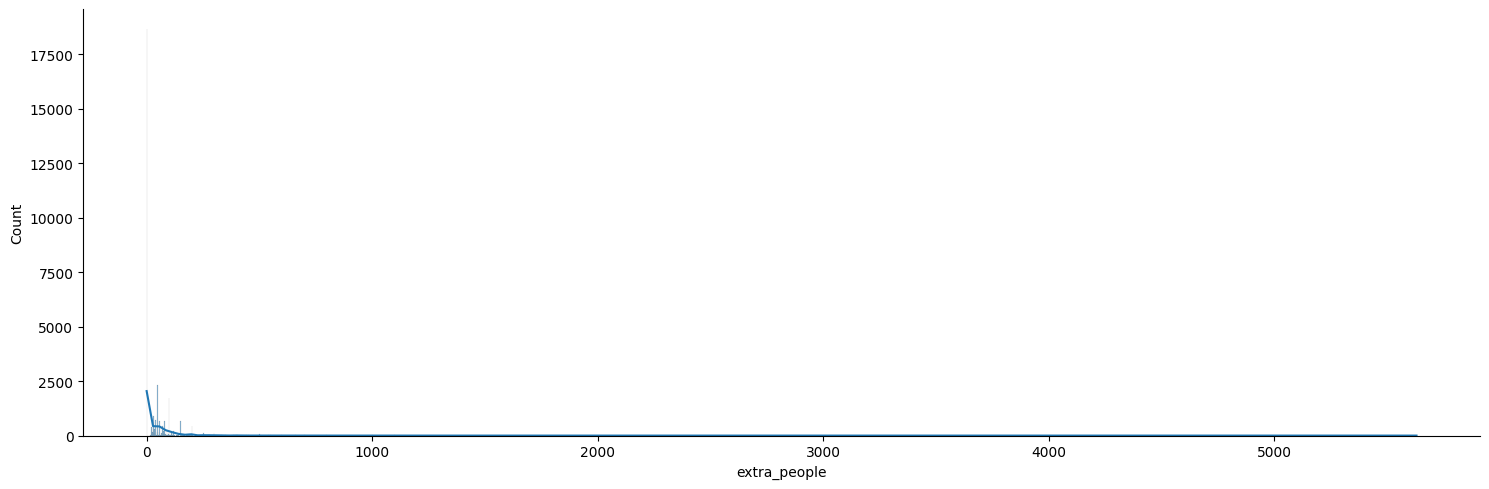

In [80]:
#Column extra_people
diagrama(df['extra_people'])
histograma(df['extra_people'])

2449 foram retiradas da coluna extra_people


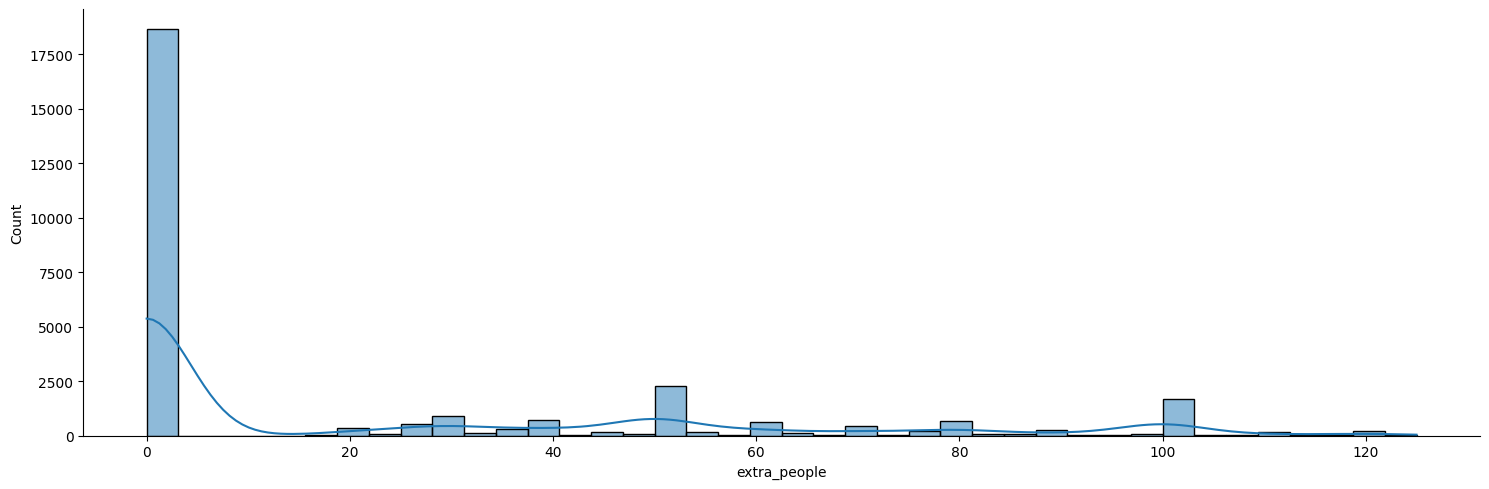

In [81]:
df = excluir_outlier(df, 'extra_people')

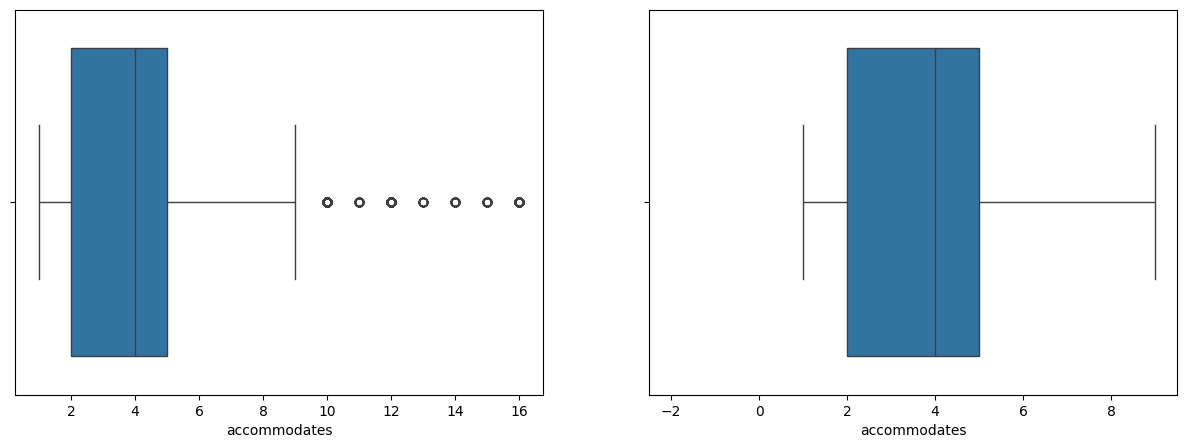

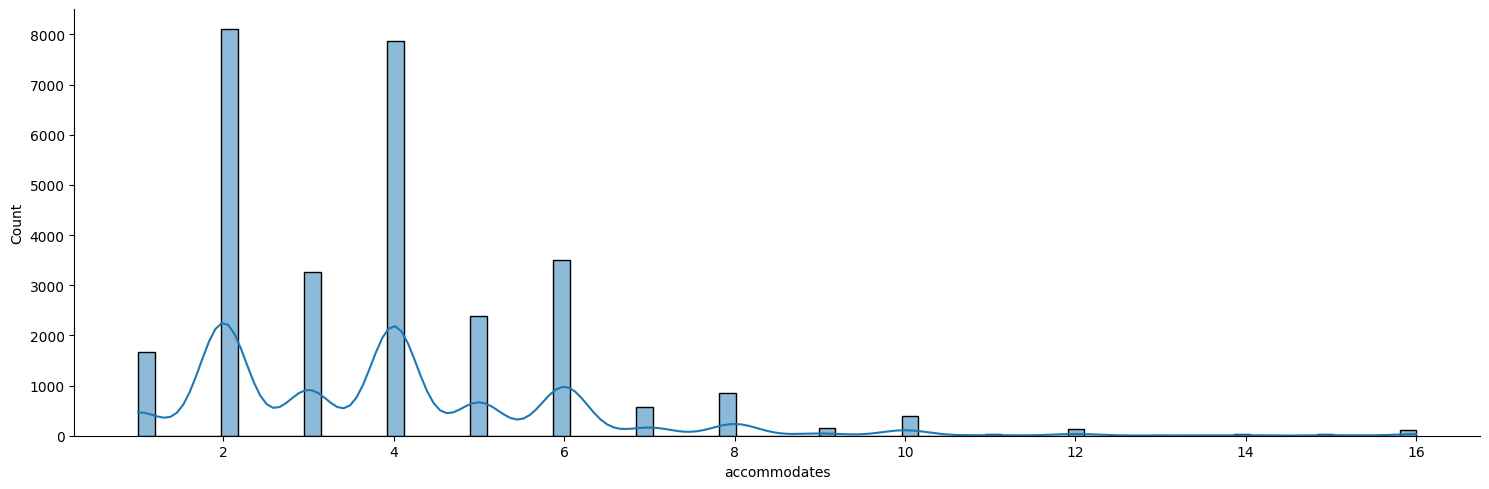

In [82]:
#Column accommodates

diagrama(df['accommodates'])
histograma(df['accommodates'])

764 foram retiradas da coluna accommodates


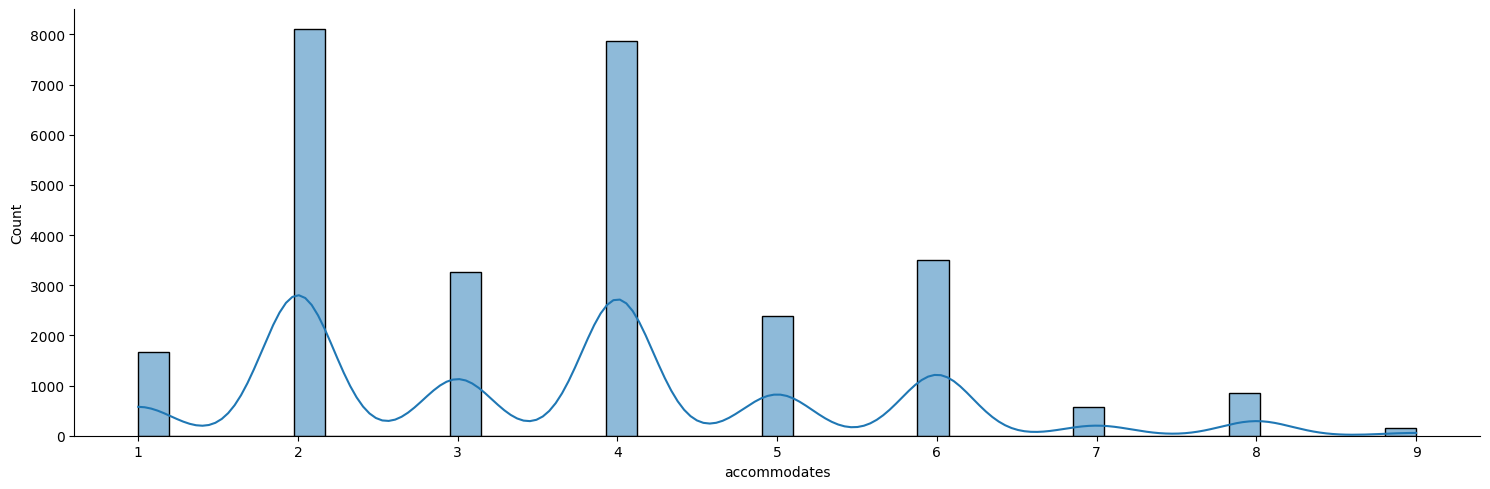

In [83]:
df = excluir_outlier(df, 'accommodates')

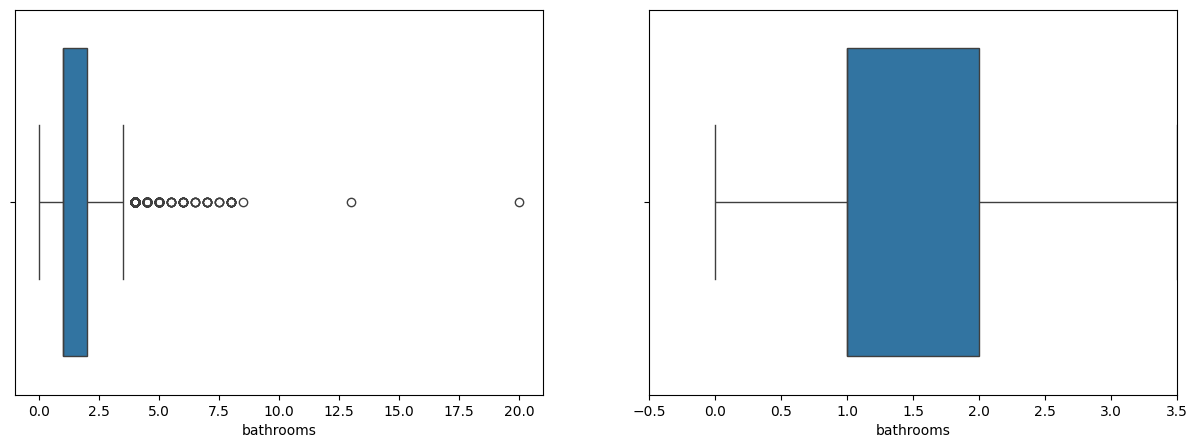

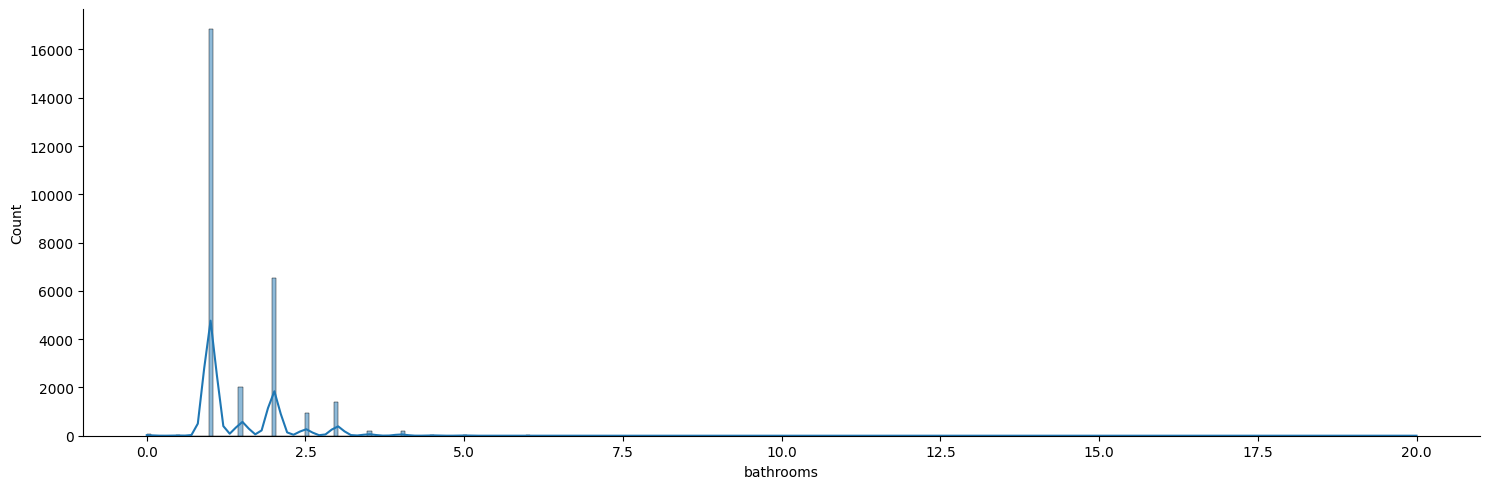

In [84]:
#Column bathrooms
diagrama(df['bathrooms'])
histograma(df['bathrooms'])

312 foram retiradas da coluna bathrooms


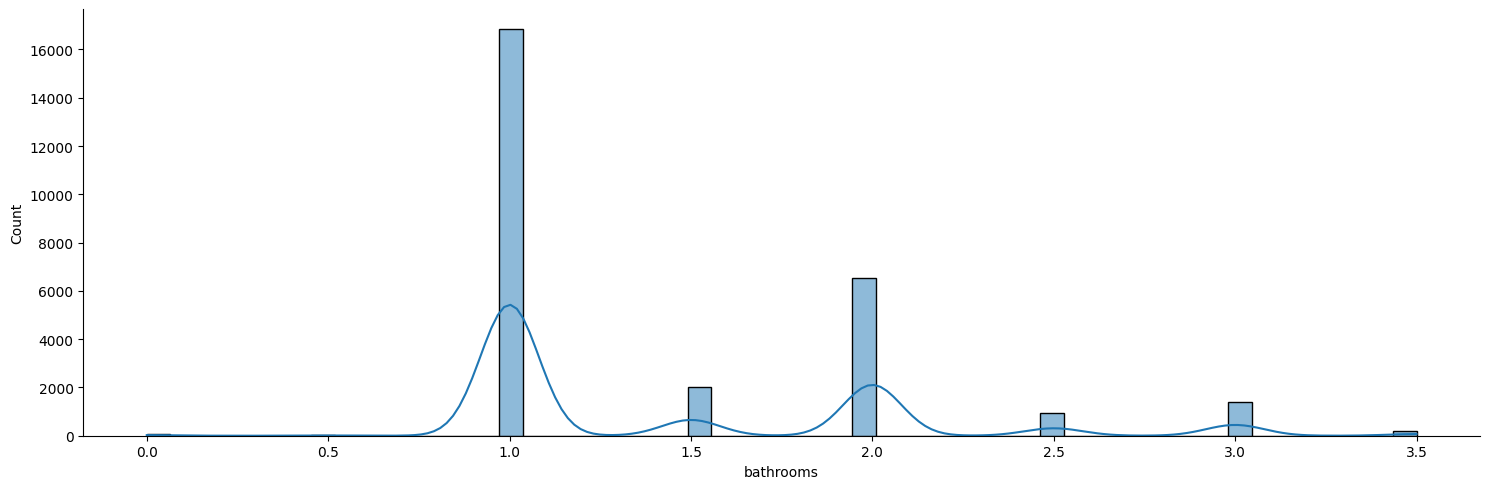

In [85]:
df = excluir_outlier(df, 'bathrooms')

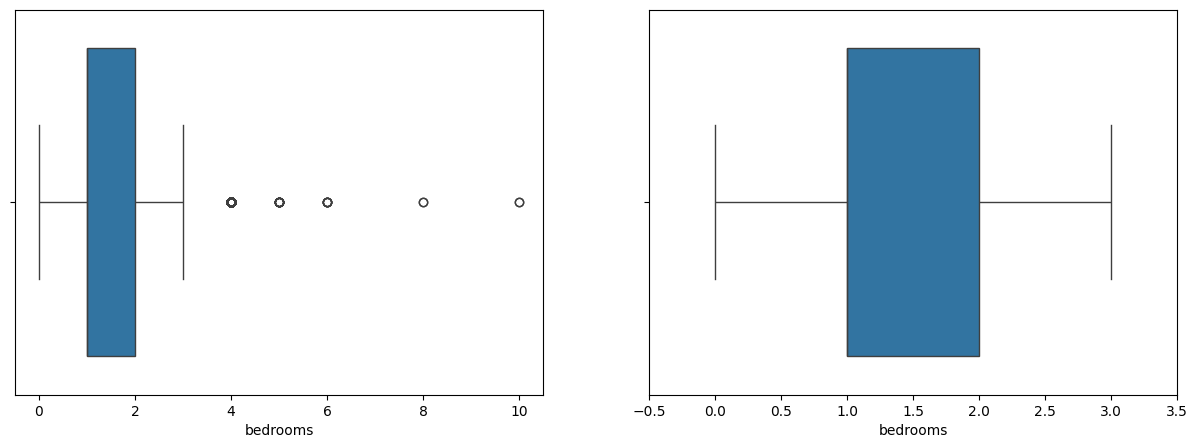

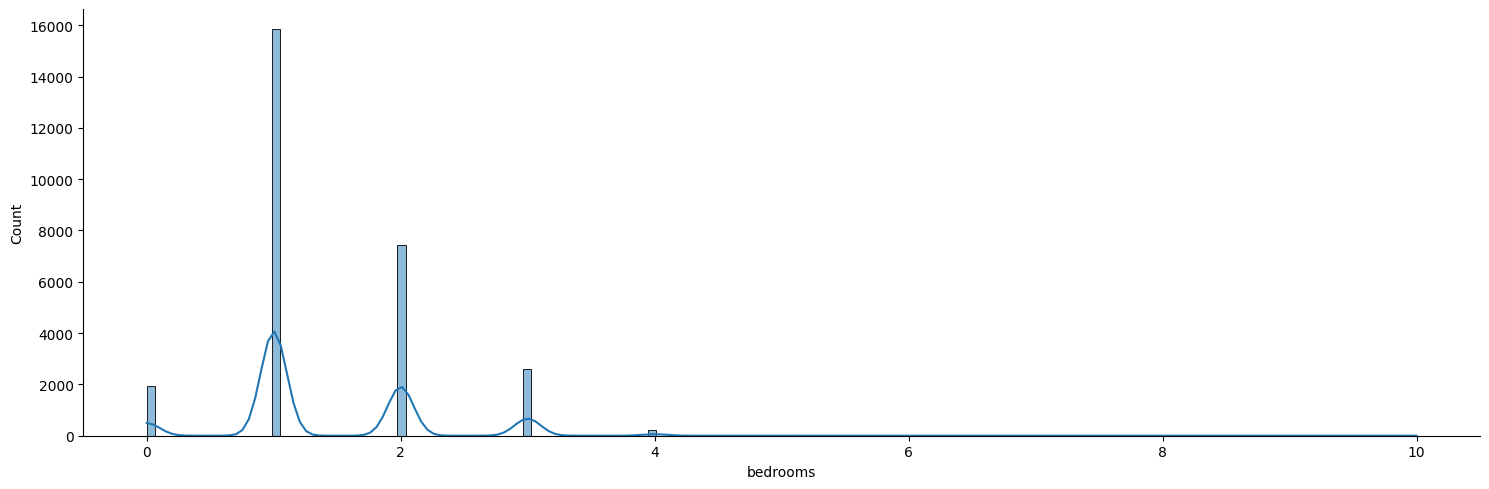

In [86]:
#Column bedrooms
diagrama(df['bedrooms'])
histograma(df['bedrooms'])

243 foram retiradas da coluna bedrooms


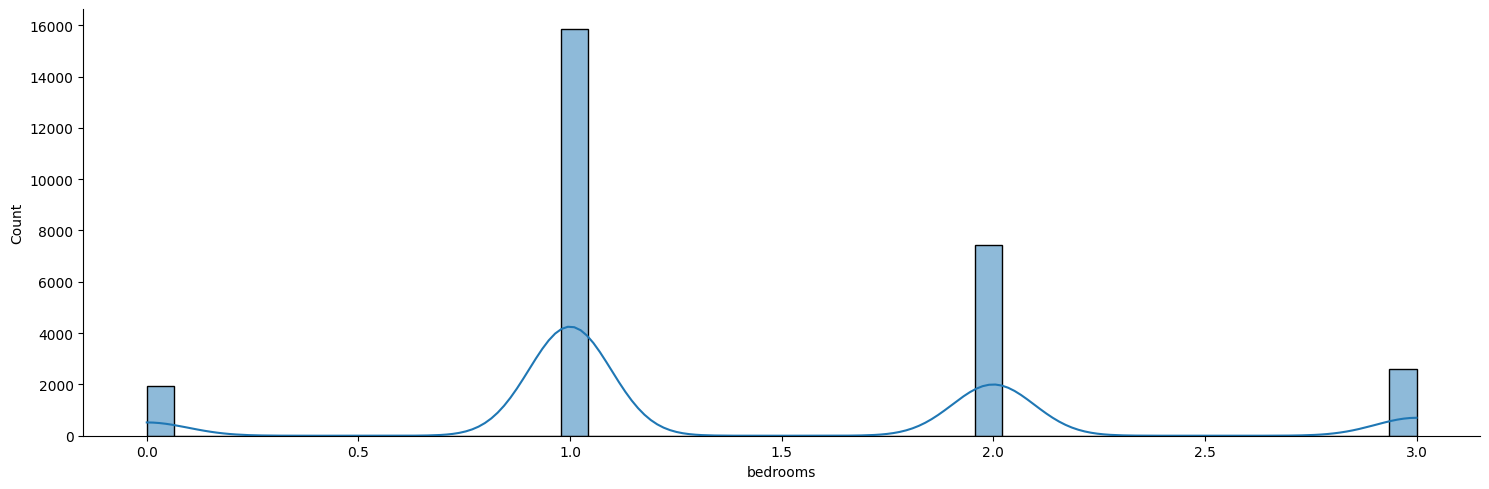

In [87]:
df = excluir_outlier(df, 'bedrooms')

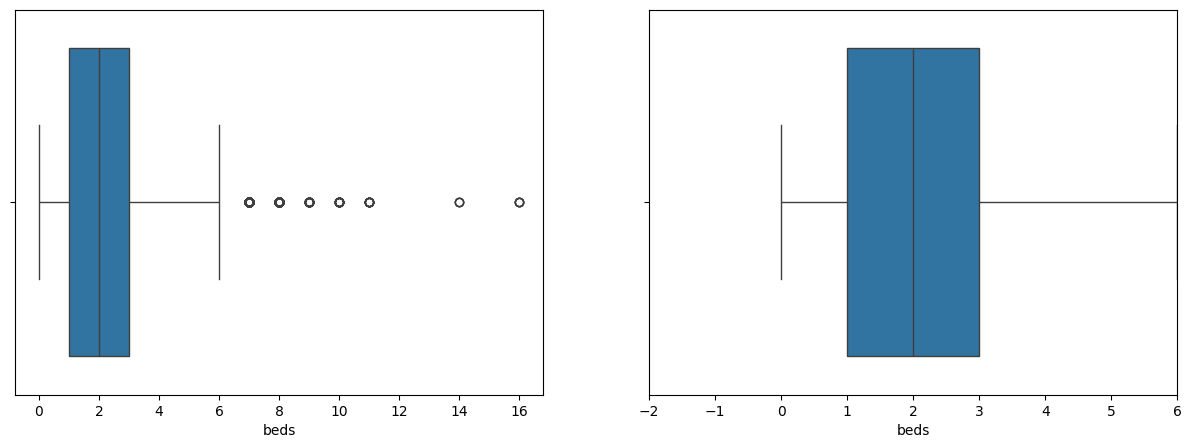

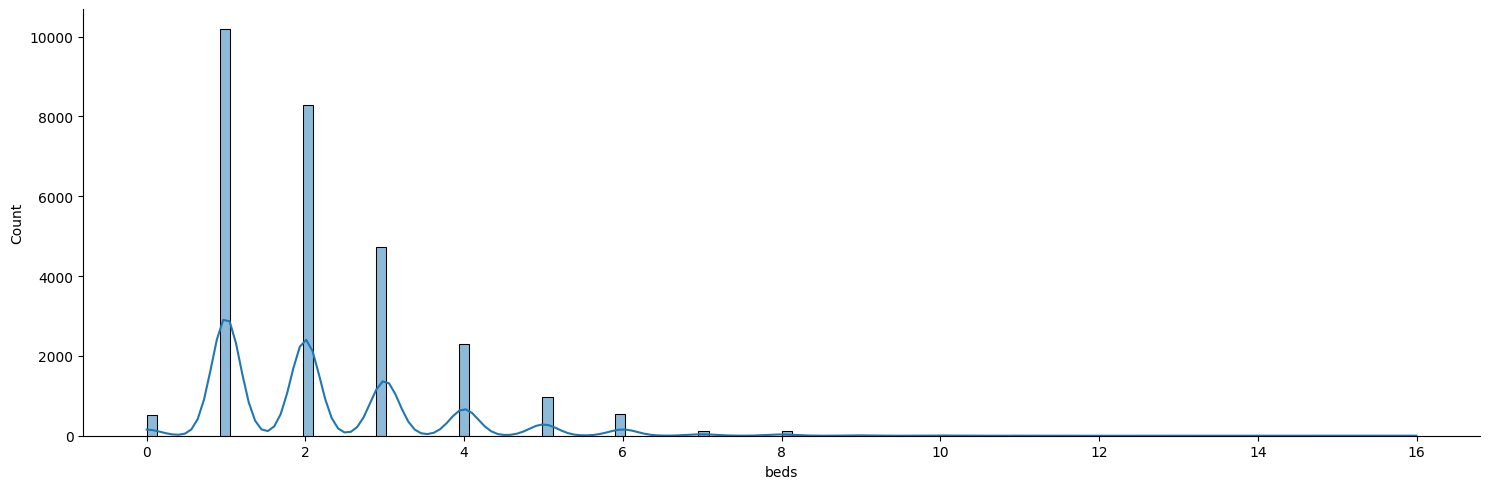

In [88]:
#Column beds
diagrama(df['beds'])
histograma(df['beds'])

291 foram retiradas da coluna beds


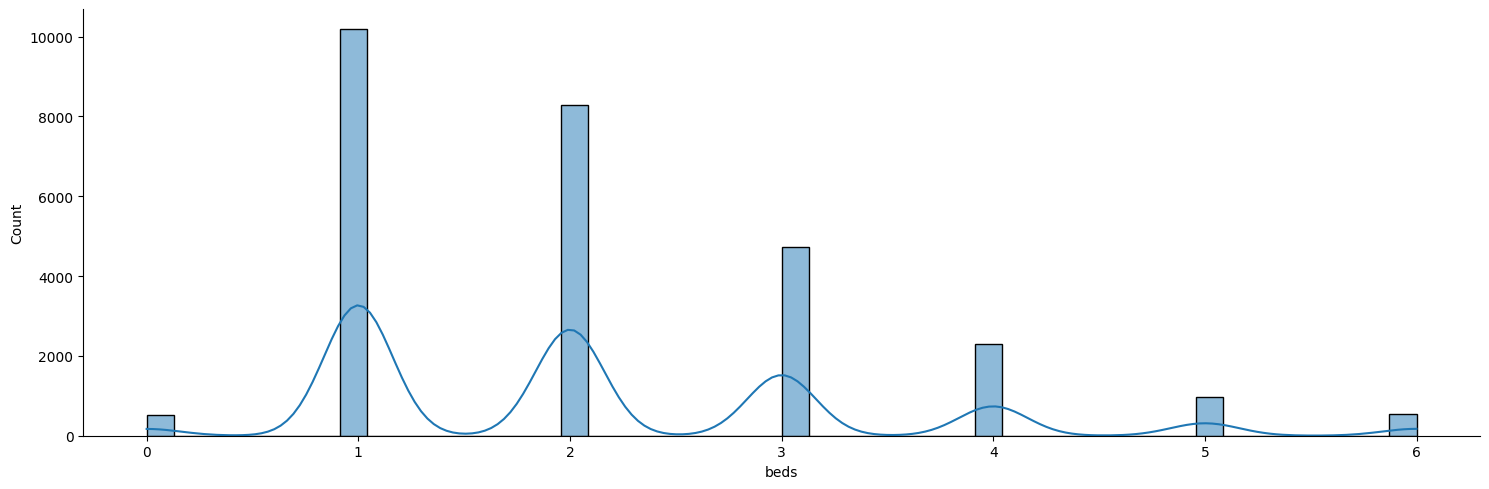

In [89]:
df = excluir_outlier(df, 'beds')

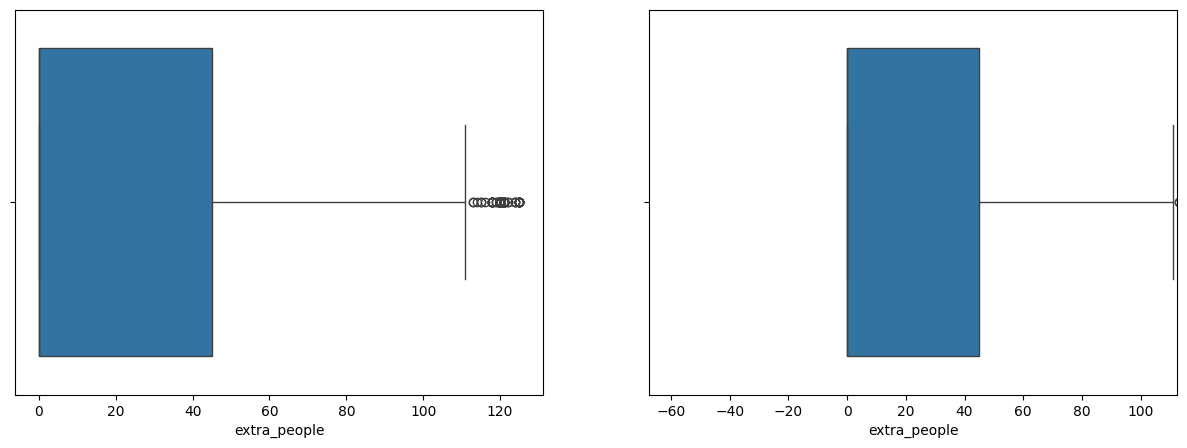

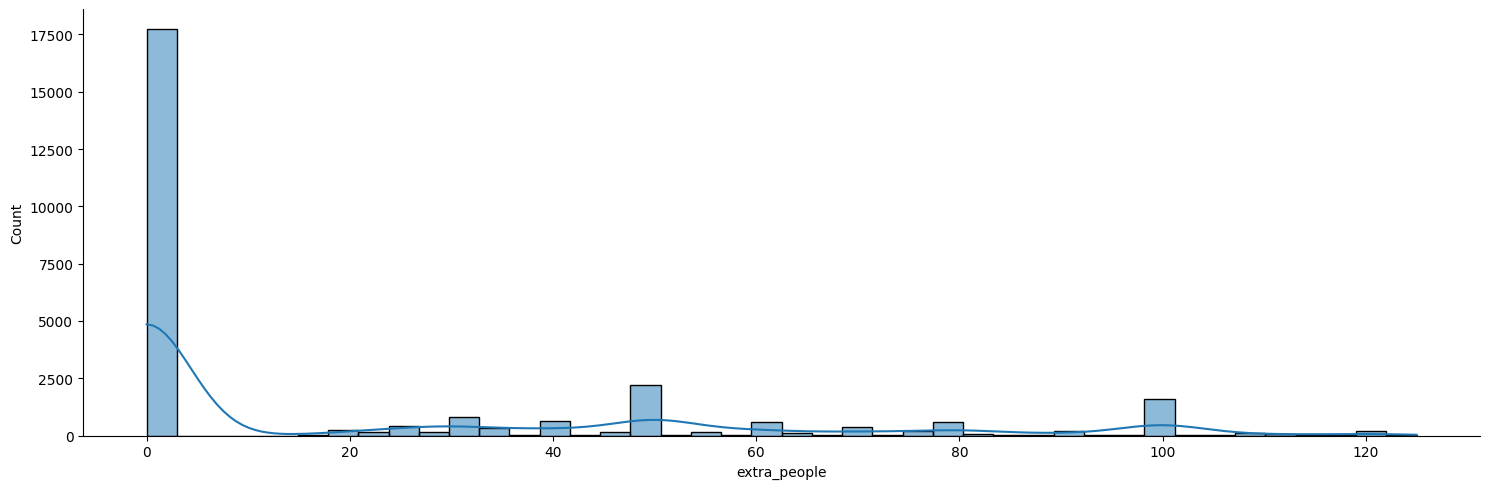

In [90]:
#Column extra_people
diagrama(df['extra_people'])
histograma(df['extra_people'])

#como os outliers não estão muito distantes não serão descartados

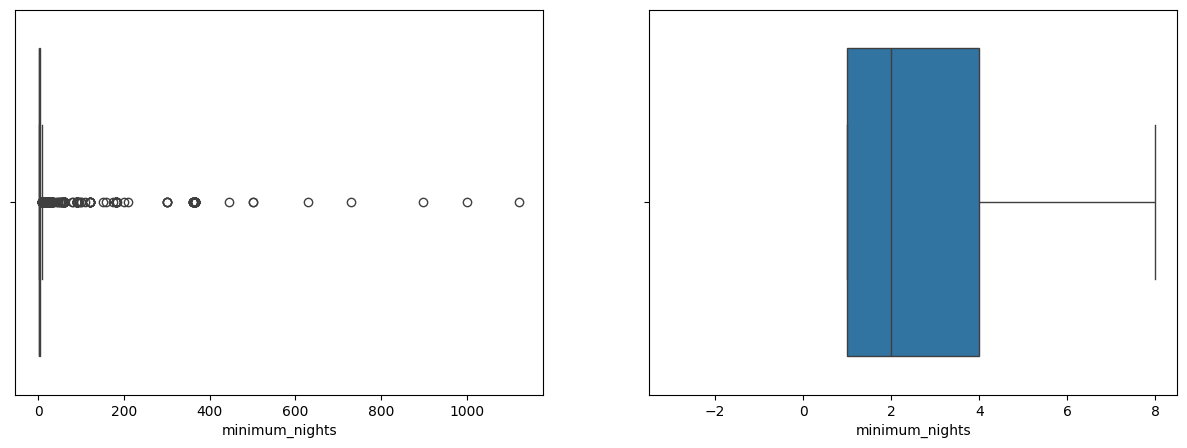

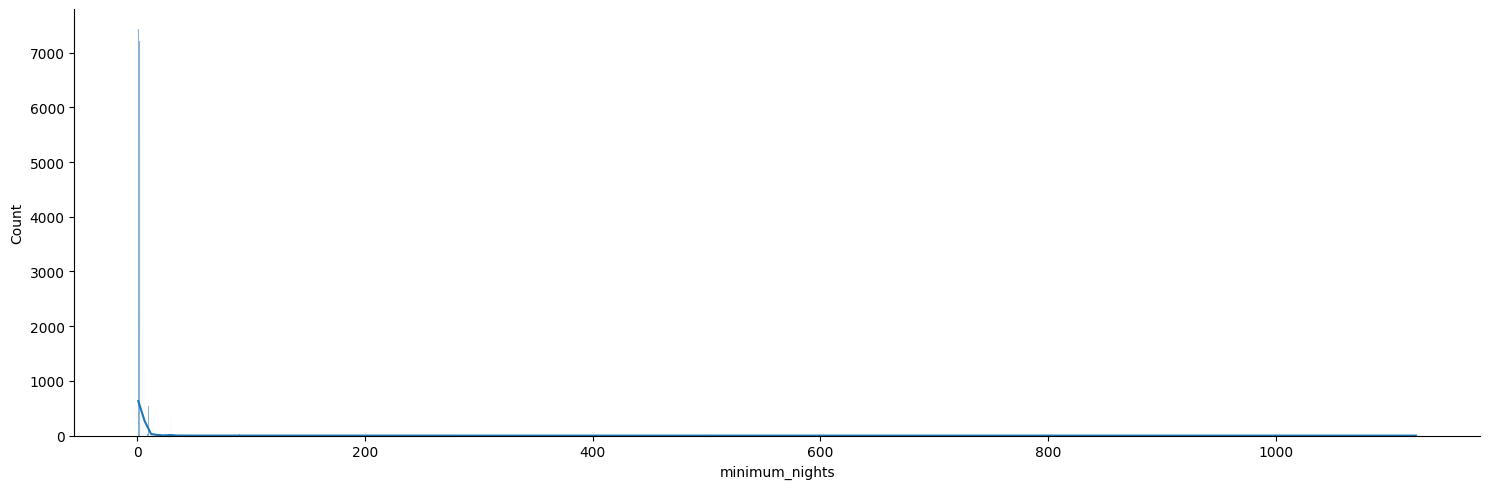

In [91]:
#Column minimum_nights
diagrama(df['minimum_nights'])
histograma(df['minimum_nights'])

1797 foram retiradas da coluna minimum_nights


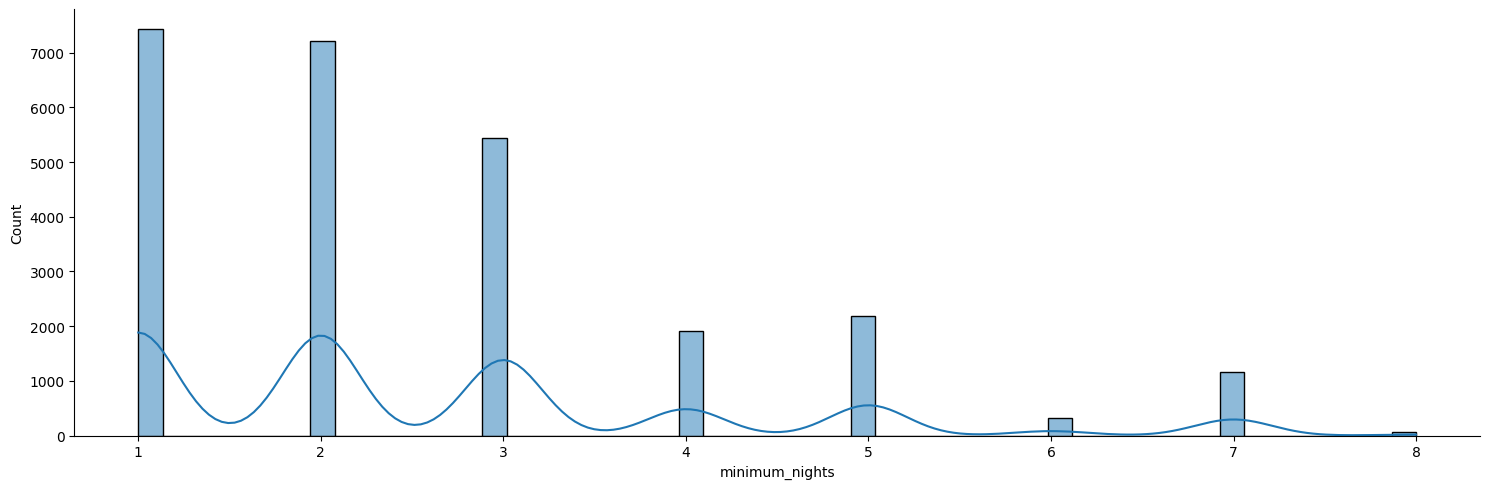

In [92]:
df = excluir_outlier(df, 'minimum_nights')

In [93]:
print(df.shape)

(25728, 17)


### Tratar as colunas de texto

In [94]:
display(df.select_dtypes(exclude='number').head())

,host_is_superhost,property_type,room_type,bed_type,amenities,instant_bookable,is_business_travel_ready,cancellation_policy
0,t,Condominium,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",t,f,moderate
1,f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",f,f,strict_14_with_grace_period
2,f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",f,f,strict_14_with_grace_period
3,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",t,f,strict_14_with_grace_period
4,f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",f,f,strict_14_with_grace_period


In [ ]:
col_true_false = ['host_is_superhost','instant_bookable','is_business_travel_ready']

df[col_true_false] = (df[col_true_false] == 't').astype(int)

In [ ]:
def colmn_text (df,col):
    order = df[col].value_counts().index

    plt.figure(figsize=(12,6))
    chart = sns.countplot(x= df[col], order= order)
    chart.tick_params(axis='x',rotation=90)
    return chart

<Axes: xlabel='property_type', ylabel='count'>

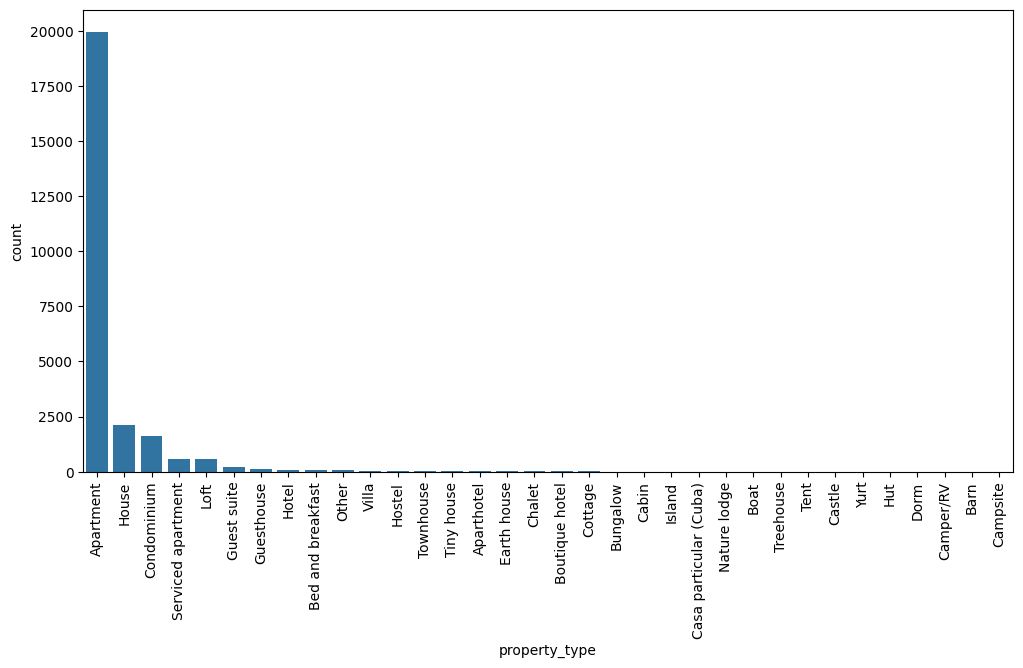

In [97]:
#Column property_type
colmn_text(df,'property_type')

In [98]:
#Como temos muitos valores unicos, ou com pouca contagem, vamos unir em uma nova categoria 

tabela_tipo_casa = df['property_type'].value_counts()
col_agrupar = []

for tipo in tabela_tipo_casa.index:
    if tabela_tipo_casa[tipo] < 1000:
        col_agrupar.append(tipo)

for tipo in col_agrupar:
    df.loc[df['property_type'] == tipo, 'property_type'] = 'Other'

<Axes: xlabel='property_type', ylabel='count'>

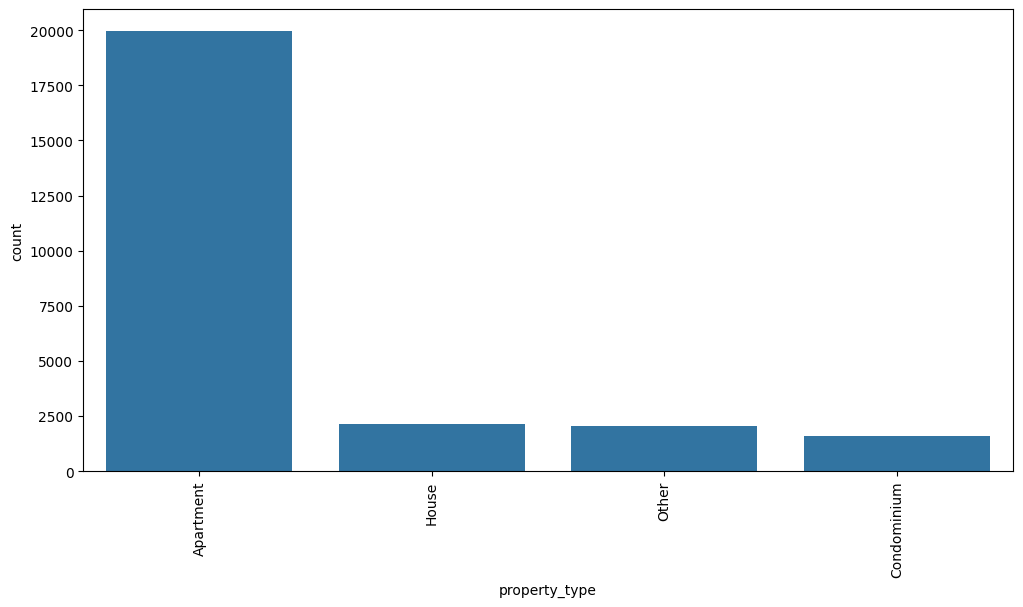

In [99]:
colmn_text(df,'property_type')

<Axes: xlabel='room_type', ylabel='count'>

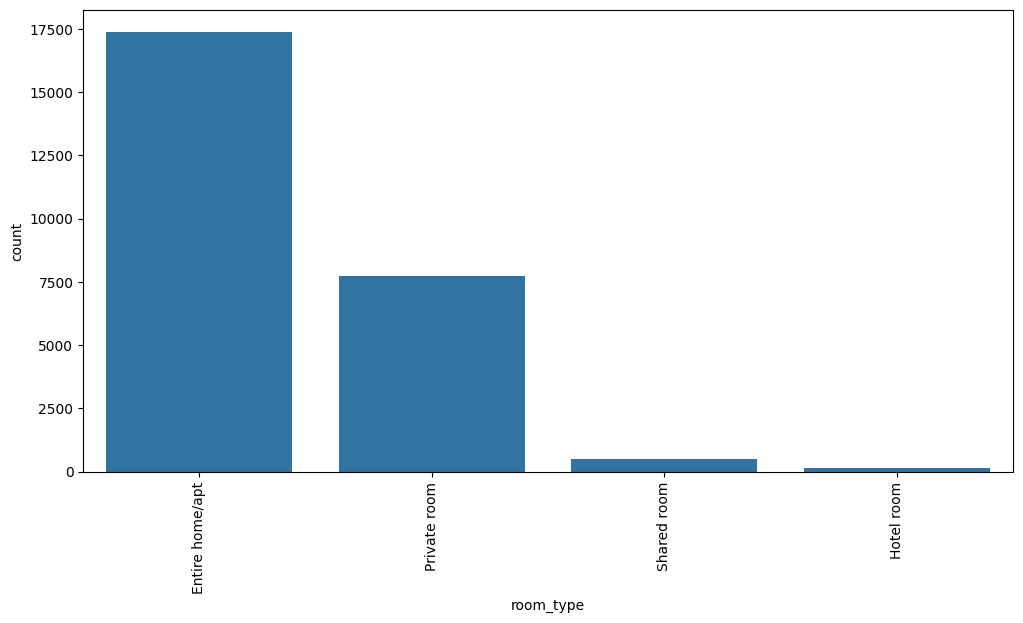

In [100]:
#Column room_type
colmn_text(df,'room_type')

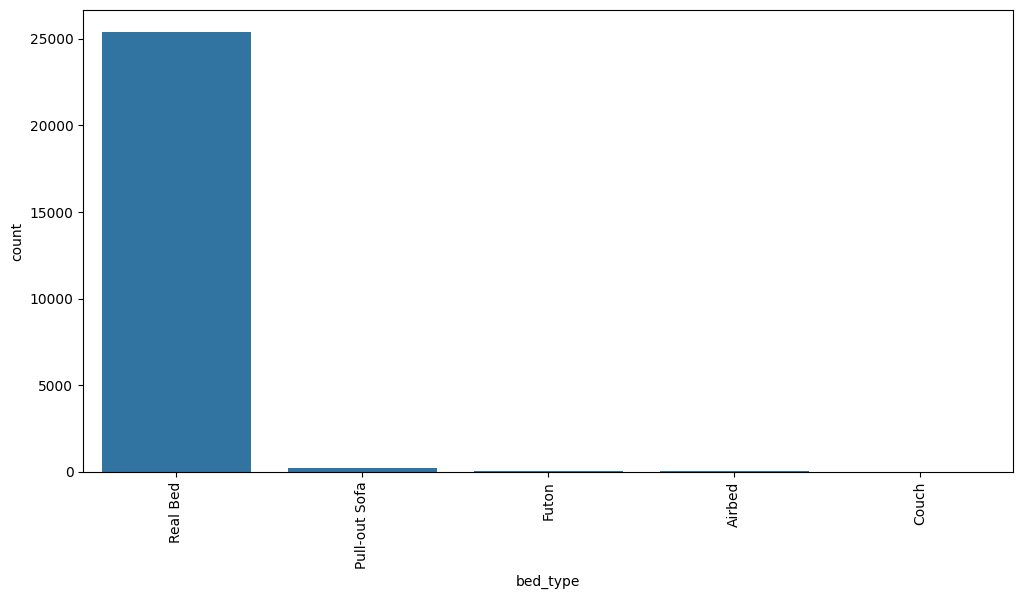

In [101]:
#Column bed_type
colmn_text(df,'bed_type')

#Quase 100% são real beds, então não faz sentido manter a coluna
df = df.drop('bed_type', axis=1) 

<Axes: xlabel='cancellation_policy', ylabel='count'>

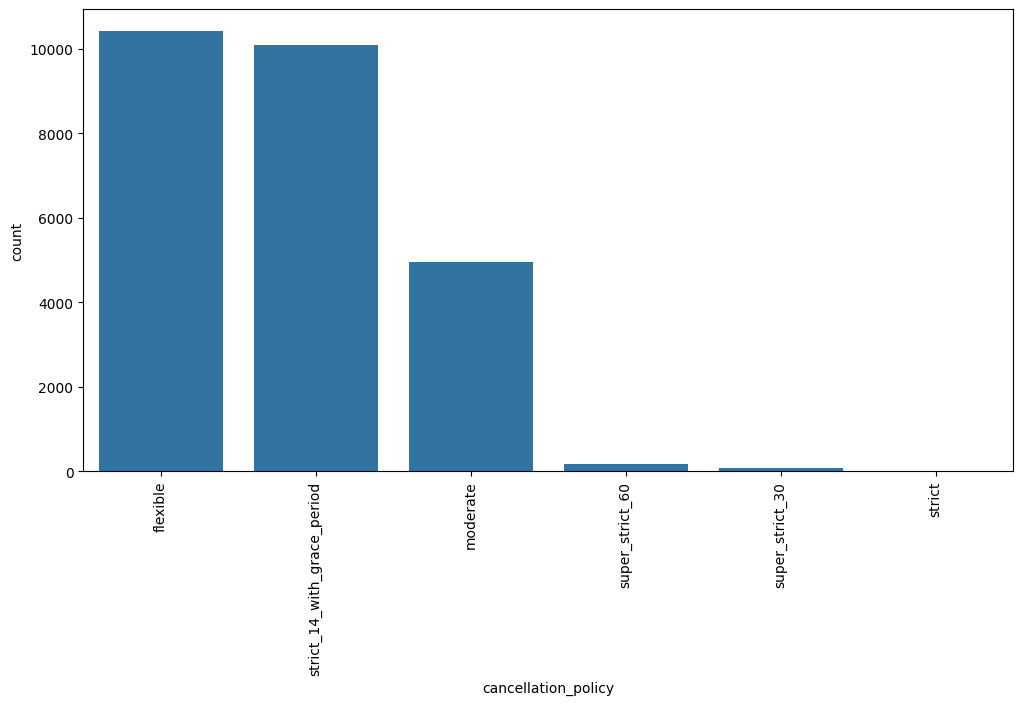

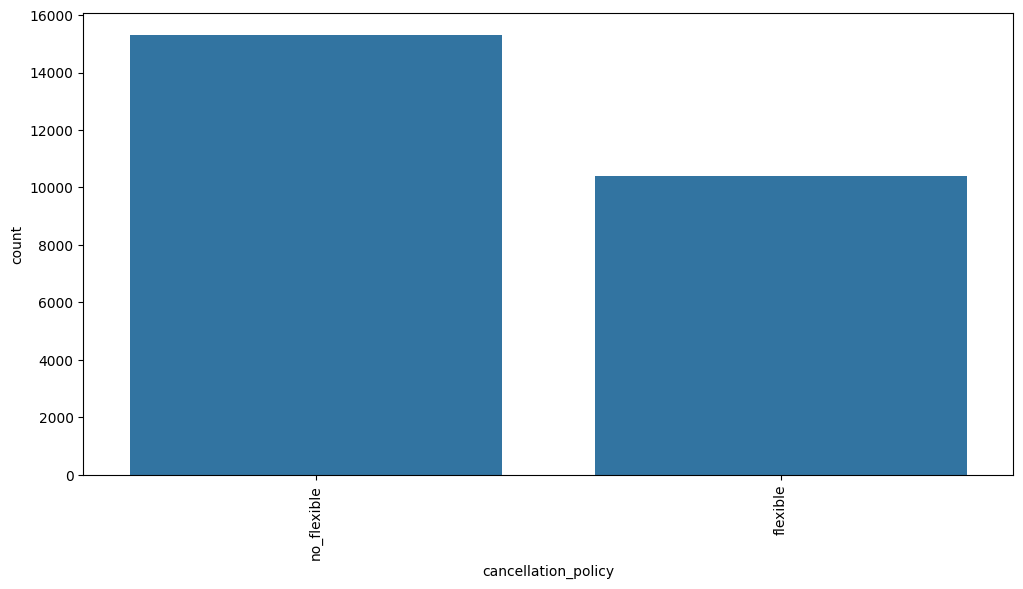

In [102]:
#Column cancellation_policy
colmn_text(df,'cancellation_policy') 

valores = np.array(df['cancellation_policy'].value_counts().index)
#print(valores[1:])
#Vamos definir se é flexivel ou não
df.loc[df['cancellation_policy'].isin(valores[1:]), 'cancellation_policy'] = 'no_flexible'

colmn_text(df,'cancellation_policy') 


In [103]:
# Analisar os amenities e deixar apenas os mais comuns
amenities_list = []

for amenity_str in df['amenities']:
    if pd.notnull(amenity_str):
        itens = amenity_str.replace('{','').replace('}','').replace('"','').split(',')
        amenities_list.extend([item.strip() for item in itens])

teste = pd.DataFrame(amenities_list, columns=['amenity'])

In [ ]:
mais_frequentes = teste.value_counts().head(30).index.tolist()

print(df.shape)

for lin in df.index:
    for amenity in mais_frequentes:
        if amenity[0] in df.loc[lin, 'amenities']:
            df.loc[lin, amenity[0]] = 1
        else:
            df.loc[lin, amenity[0]] = 0

print(df.shape)

df = df.drop('amenities', axis=1)

(25728, 16)
(25728, 46)


### Preparação para os modelos de previsão

In [107]:
column_nao_numerico = ['property_type', 'room_type','cancellation_policy']

df = pd.get_dummies(data= df, columns=column_nao_numerico).astype(float)
display(df.head())

,host_is_superhost,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,...,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_no_flexible
0,1.0,-22.96592,-43.17896,5.0,1.0,2.0,2.0,188.0,0.0,7.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,-22.98467,-43.19611,6.0,2.0,2.0,4.0,442.0,0.0,5.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,-22.97712,-43.19045,2.0,1.0,1.0,2.0,160.0,45.0,7.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,-22.98302,-43.21427,3.0,1.0,1.0,1.0,359.0,55.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,-22.98816,-43.19359,2.0,1.5,1.0,1.0,495.0,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [108]:
aux = pd.DataFrame({
    'Values': df.iloc[0],
    'Type': df.dtypes
})

display(aux)

,Values,Type
host_is_superhost,1.00000,float64
latitude,-22.96592,float64
longitude,-43.17896,float64
accommodates,5.00000,float64
bathrooms,1.00000,float64
bedrooms,2.00000,float64
beds,2.00000,float64
price,188.00000,float64
extra_people,0.00000,float64
minimum_nights,7.00000,float64


### Resultados com MLs

O melhor resultado encontrado com essa preparação de dados foi de R^2 de 0.4816 com o modelo XGBoost. Com isso, vamos continuar tratando a base para tentar chegar em um R^2 proximo de 0.7

C:\Users\costa\AppData\Local\Temp\ipykernel_16272\3941085483.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





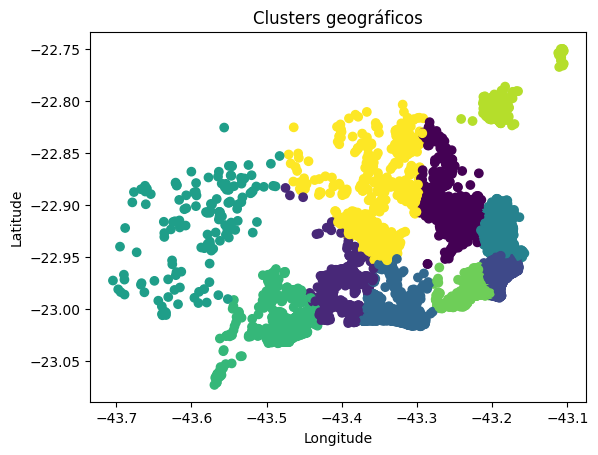

In [109]:
# Quarto e Banheiros possuem valores próximos, eles se tornarão uma relação entre quarto / banheiro
df['relation_bathrooms_bedrooms'] = df['bedrooms'] / df['bathrooms']
df['relation_bathrooms_bedrooms'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
df = df.drop(['bedrooms','bathrooms'], axis=1)

# Vamos fazer um clust das coordenadas para localização proximas e diminuir as variaveis
from sklearn.cluster import KMeans
coords = df[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=10, random_state=66) # O numero de clusters foi definido em 10 após visualização do mapa de densidade
df['cluster'] = kmeans.fit_predict(coords)

plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters geográficos')
plt.show()

df = df.drop(['latitude','longitude'], axis=1)

# A coluna "is_business_travel_ready" possui o mesmo valor, então vão retirar
df = df.drop('is_business_travel_ready', axis=1)

# Retirar os valores de "price" igual a zero
df = df[df["price"] != 0]

# Transformar a coluna "price" em logaritmo para melhorar a distribuição
df['price'] = np.log1p(df['price'])

df.to_csv(r'Dataframe_airbnb\listings_tratada_v3.csv', index=False)



In [110]:
display(df.head())
print(df.shape)

for coluna in df.columns:
    if len(df[coluna].value_counts()) == 2:
        valores = df[coluna].value_counts()
        
        razao = valores.min() / valores.max()

        if razao < 0.01:
            #df = df.drop(coluna, axis=1)
            print(f'Coluna: {coluna} - Razão: {razao:.3f}')

,host_is_superhost,accommodates,beds,price,extra_people,minimum_nights,instant_bookable,Kitchen,Wifi,Essentials,...,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_no_flexible,relation_bathrooms_bedrooms,cluster
0,1.0,5.0,2.0,5.241747,0.0,7.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.000000,2
1,0.0,6.0,4.0,6.093570,0.0,5.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,2
2,0.0,2.0,2.0,5.081404,45.0,7.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,2
3,1.0,3.0,1.0,5.886104,55.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,7
4,0.0,2.0,1.0,6.206576,0.0,2.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.666667,2


(25721, 49)
Coluna: room_type_Hotel room - Razão: 0.005


In [111]:
display(df.describe())

,host_is_superhost,accommodates,beds,price,extra_people,minimum_nights,instant_bookable,Kitchen,Wifi,Essentials,...,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_no_flexible,relation_bathrooms_bedrooms,cluster
count,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,...,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000,25721.000000
mean,0.150500,3.579371,2.108355,5.514217,22.566269,2.617239,0.415342,0.908868,0.893200,0.858598,...,0.082928,0.078885,0.676023,0.005015,0.299638,0.019323,0.404728,0.595272,0.991476,3.200187
std,0.357567,1.661688,1.255517,0.761940,33.908898,1.613834,0.492790,0.287802,0.308865,0.348442,...,0.275779,0.269564,0.468000,0.070643,0.458109,0.137659,0.490849,0.490849,0.463634,2.171749
min,0.000000,1.000000,0.000000,3.367296,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,5.003946,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,0.000000,4.000000,2.000000,5.513429,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,0.000000,4.000000,3.000000,6.037871,50.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,9.000000,6.000000,7.240650,125.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000
